In [4]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns


In [6]:

# Dataset paths (update as needed)
TRAIN_PATH = r"C:\Users\Admin\Downloads\COVID-19-master\COVID-19-master\Train"
VAL_PATH = r"C:\Users\Admin\Downloads\COVID-19-master\COVID-19-master\Val"


In [7]:

# Define the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Binary classification: COVID vs Non-COVID
])


c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:

# Compile the model
model.compile(
    loss='binary_crossentropy',
    optimizer=Adam(learning_rate=0.0001),
    metrics=['accuracy']
)


In [9]:

# Data augmentation for training images
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)


In [10]:

# Validation images are only rescaled
val_datagen = ImageDataGenerator(rescale=1.0/255)


In [11]:

# Load training and validation data
train_generator = train_datagen.flow_from_directory(
    TRAIN_PATH,
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary'
)

validation_generator = val_datagen.flow_from_directory(
    VAL_PATH,
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary'
)


Found 224 images belonging to 2 classes.
Found 60 images belonging to 2 classes.


In [12]:

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // 32,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // 32
)


c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.5180 - loss: 0.7088 - val_accuracy: 0.3438 - val_loss: 0.7461
Epoch 2/10


c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 86ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.6786 - val_loss: 0.5767
Epoch 3/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 785ms/step - accuracy: 0.5779 - loss: 0.6501
Epoch 4/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 79ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.9688 - val_loss: 0.5863
Epoch 5/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 807ms/step - accuracy: 0.7953 - loss: 0.5890 - val_accuracy: 0.8929 - val_loss: 0.5235
Epoch 6/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 7/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 896ms/step - accuracy: 0.8083 - loss: 0.5268 - val_accuracy: 0.9688 - val_loss: 0.3869
Epoch 8/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 89ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.9643 - val_loss: 0.4356
Epoch 9/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 769ms/step - accuracy: 0.8831 - loss: 0.4156
Epoch 10/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accu

In [13]:

# Save the trained model
model.save("covid19_xray_model.h5")


In [14]:

# Evaluate the model
train_loss, train_acc = model.evaluate(train_generator)
val_loss, val_acc = model.evaluate(validation_generator)

print(f"Training Accuracy: {train_acc:.2f}")
print(f"Validation Accuracy: {val_acc:.2f}")


7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 591ms/step - accuracy: 0.9349 - loss: 0.3238
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 710ms/step - accuracy: 0.9667 - loss: 0.2862
Training Accuracy: 0.93
Validation Accuracy: 0.95


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step


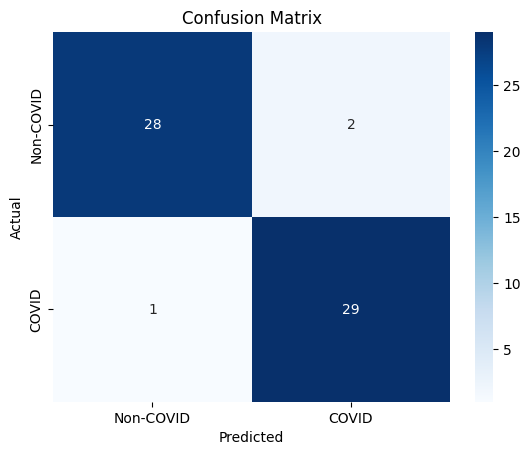

In [15]:

# Confusion matrix and classification report
y_actual = []
y_pred = []

for i in validation_generator:
    X, y = i
    y_actual.extend(y)
    y_pred.extend((model.predict(X) > 0.5).astype(int))
    if len(y_actual) >= validation_generator.samples:
        break

cm = confusion_matrix(y_actual[:len(y_pred)], y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Non-COVID", "COVID"], yticklabels=["Non-COVID", "COVID"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [16]:

# Print classification report
print(classification_report(y_actual[:len(y_pred)], y_pred, target_names=["Non-COVID", "COVID"]))


              precision    recall  f1-score   support

   Non-COVID       0.97      0.93      0.95        30
       COVID       0.94      0.97      0.95        30

    accuracy                           0.95        60
   macro avg       0.95      0.95      0.95        60
weighted avg       0.95      0.95      0.95        60

